D:\Study Files\Year3 semB\CS4186\assign1\Queries\01.txt
275
96
330
770


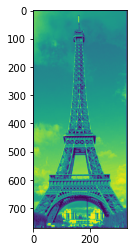

D:\Study Files\Year3 semB\CS4186\assign1\Queries\02.txt
274
31
197
282


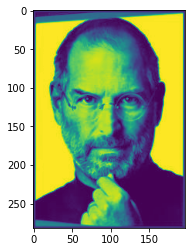

D:\Study Files\Year3 semB\CS4186\assign1\Queries\03.txt
210
80
319
580


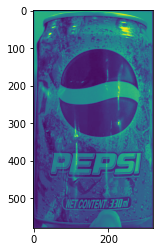

D:\Study Files\Year3 semB\CS4186\assign1\Queries\04.txt
376
8
257
619


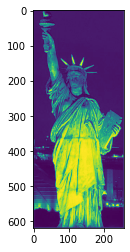

D:\Study Files\Year3 semB\CS4186\assign1\Queries\05.txt
60
195
586
516


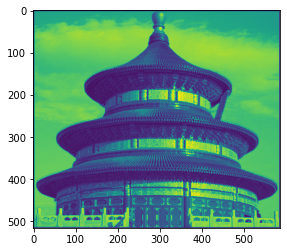

D:\Study Files\Year3 semB\CS4186\assign1\Queries\06.txt
245
267
652
269


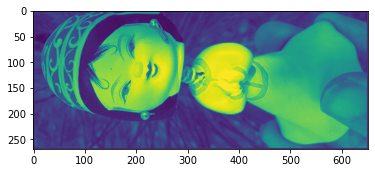

D:\Study Files\Year3 semB\CS4186\assign1\Queries\07.txt
26
23
712
302


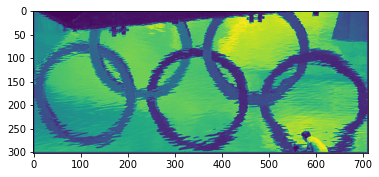

D:\Study Files\Year3 semB\CS4186\assign1\Queries\08.txt
60
85
263
161


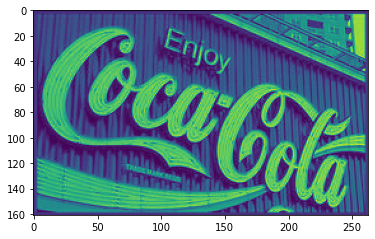

D:\Study Files\Year3 semB\CS4186\assign1\Queries\09.txt
293
53
476
452


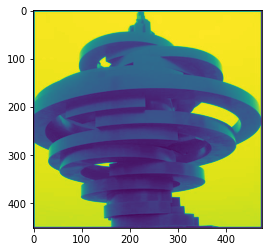

D:\Study Files\Year3 semB\CS4186\assign1\Queries\10.txt
287
43
336
543


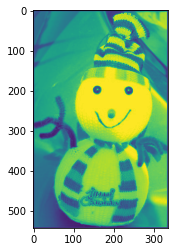

D:\Study Files\Year3 semB\CS4186\assign1\Queries\11.txt
193
19
236
358


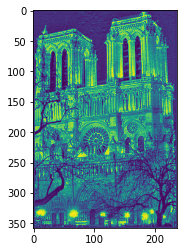

D:\Study Files\Year3 semB\CS4186\assign1\Queries\12.txt
64
55
245
336


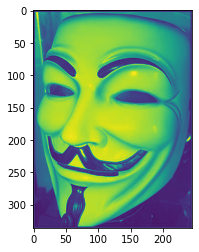

D:\Study Files\Year3 semB\CS4186\assign1\Queries\13.txt
285
442
323
480


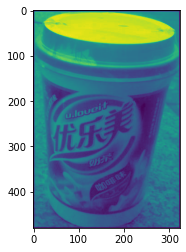

D:\Study Files\Year3 semB\CS4186\assign1\Queries\14.txt
49
118
198
144


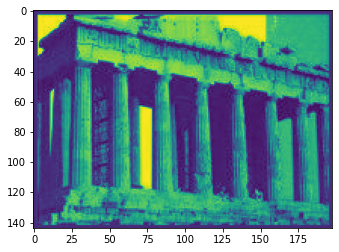

D:\Study Files\Year3 semB\CS4186\assign1\Queries\15.txt
11
11
123
181


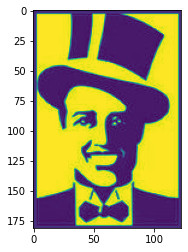

D:\Study Files\Year3 semB\CS4186\assign1\Queries\16.txt
166
48
294
323


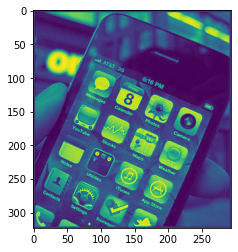

D:\Study Files\Year3 semB\CS4186\assign1\Queries\17.txt
35
55
372
367


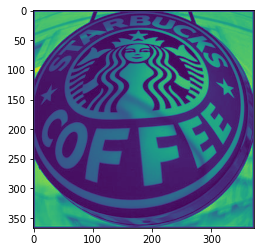

D:\Study Files\Year3 semB\CS4186\assign1\Queries\18.txt
154
22
376
599


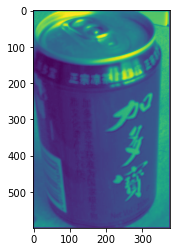

D:\Study Files\Year3 semB\CS4186\assign1\Queries\19.txt
199
37
479
485


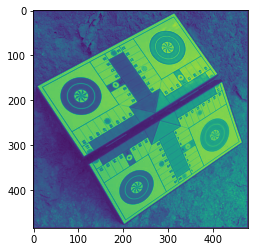

D:\Study Files\Year3 semB\CS4186\assign1\Queries\20.txt
198
294
285
235


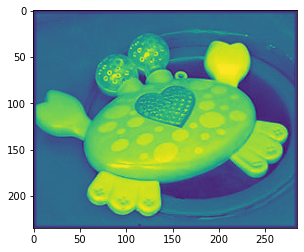

In [1]:
import cv2 
from PIL import Image   
import matplotlib.pyplot as plt
import numpy 
import glob
import logging
%matplotlib inline

class Result:
  def __init__(self, id, match):
    self.id = id
    self.match = match

def sortResults(r):
    return r.match   

output = open("ranklist.txt", "a")

j = 1
for file in glob.glob(r"D:\Study Files\Year3 semB\CS4186\assign1\Queries\*.jpg"):
    output.write("Q"+str(j)+":")
    logging.info(file)
    query = Image.open(file)
    if(j<10):
        querypath = "D:\Study Files\Year3 semB\CS4186\\assign1\Queries\\0" + str(j) + ".txt"
    else: 
        querypath = "D:\Study Files\Year3 semB\CS4186\\assign1\Queries\\" + str(j) + ".txt"
    print(querypath)
    fquery = open(querypath, "r")
    strquery = fquery.readline().split(" ")
    fquery.close()
    query = query.crop((int(strquery[0]), int(strquery[1]), int(strquery[0])+int(strquery[2]), int(strquery[1])+int(strquery[3])))
    print((int(strquery[0])))
    print((int(strquery[1])))
    print((int(strquery[2])))
    print((int(strquery[3])))
    query = numpy.array(query)
    query = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints_query, descriptors_query = sift.detectAndCompute(query,None)
    plt.imshow(query),plt.show()
    results = []
    j+=1
    i=1

    for infile in glob.glob(r"D:\Study Files\Year3 semB\CS4186\assign1\Images\*.jpg"):
        logging.info(infile)
        if(i<=2000):
            img = Image.open(infile)
            if(i<10):
                path = "D:\Study Files\Year3 semB\CS4186\\assign1\Images\\000" + str(i) + ".txt"
            elif (i<100):
                path = "D:\Study Files\Year3 semB\CS4186\\assign1\Images\\00" + str(i) + ".txt"
            elif (i<1000):
                path = "D:\Study Files\Year3 semB\CS4186\\assign1\Images\\0" + str(i) + ".txt"
            else:
                path = "D:\Study Files\Year3 semB\CS4186\\assign1\Images\\" + str(i) + ".txt"
            f = open(path, "r")
            strr = f.readline().split(" ")
            f.close()
            img = img.crop((int(strr[0]), int(strr[1]), int(strr[0])+int(strr[2]), int(strr[1])+int(strr[3])))
            img = numpy.array(img)
        else:
            img = cv2.imread(infile)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(img,None)
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(descriptors_query,descriptors, k=2)
        goodMatches = []
        for m,n in matches:
            if m.distance < 0.75*n.distance:
                goodMatches.append([m])
        result = Result(i, len(goodMatches))
        results.append(result)
        i+=1

    results = sorted(results, key = sortResults, reverse = True)

    for r in results:
        output.write(" "+str(r.id))
    output.write("\n")
output.close()